In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# csv 파일 읽어오기
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape, test.shape

((891, 12), (418, 11))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 결측치 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# 통계치 확인
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# 유일값
train['Survived'].unique()

array([0, 1], dtype=int64)

In [9]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
# 성별에 따른 생존자여부
# 생존자의 성별
train[train['Survived']==1]['Sex'].value_counts()
train[train['Survived']==0]['Sex'].value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [12]:
s = train[train['Survived']==1]['Sex'].value_counts()
d = train[train['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([s,d])
df.index = ['Survived', 'Dead']
df

,female,male
Survived,233,109
Dead,81,468


<AxesSubplot:>

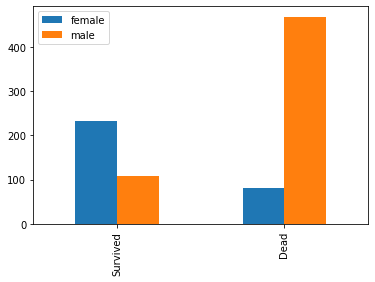

In [13]:
df.plot(kind='bar')

<AxesSubplot:xlabel='Survived', ylabel='count'>

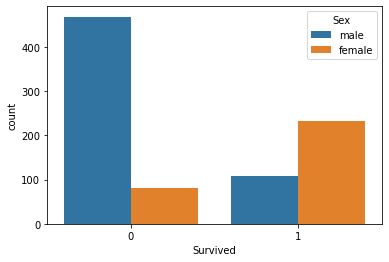

In [14]:
import seaborn as sns
sns.countplot(x=train['Survived'], hue=train['Sex'])

<AxesSubplot:>

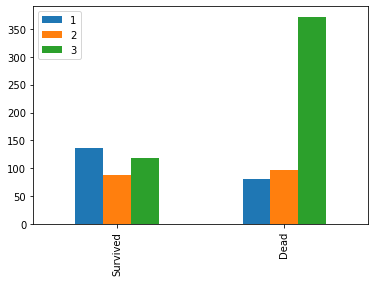

In [15]:
# 객실등급(Pclass)에 따른 생존여부
s = train[train['Survived']==1]['Pclass'].value_counts()
d = train[train['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([s,d])
df.index = ['Survived', 'Dead']
df.plot(kind='bar')

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

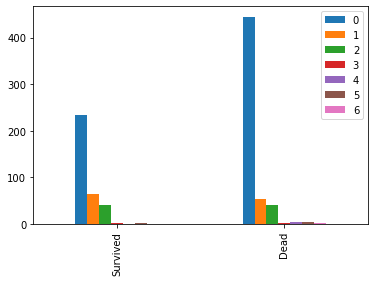

In [17]:
s = train[train['Survived']==1]['Parch'].value_counts()
d = train[train['Survived']==0]['Parch'].value_counts()
df = pd.DataFrame([s,d])
df.index = ['Survived', 'Dead']
df.plot(kind='bar')

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 전처리 시작

In [19]:
# 탑승자식별번호, 티켓번호, 객실번호(결측치가 너무 많음) 변수는 생존여부에 큰 영향을 주지 않을것으로 판단
# 3 변수를 제거
train = train.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

In [20]:
test = test.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

In [21]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [22]:
train['Age'].isnull().sum()

177

In [23]:
# 성별에 따른 나이의 중간값으로 대체(결측치 처리)
train.groupby('Sex')['Age'].transform('median')
train['Age'].fillna(train.groupby('Sex')['Age'].transform('median'), inplace=True)
train['Age'].isnull().sum()

0

In [24]:
test['Age'].fillna(test.groupby('Sex')['Age'].transform('median'), inplace=True)
test['Age'].isnull().sum()

0

In [25]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [26]:
train['Age'].describe()

count    891.000000
mean      29.441268
std       13.018747
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [27]:
# Age를 범위값으로 변경
# 15이하 0, 20이하 1, 25이하 2, 30이하 3, 35이하 4, 50이하 5 나머지 6

In [28]:
train.loc[train['Age'] <= 15,'Age']=0
train.loc[(train['Age'] > 15) & (train['Age'] <= 20),'Age']=1
train.loc[(train['Age'] > 20) & (train['Age'] <= 25),'Age']=2
train.loc[(train['Age'] > 25) & (train['Age'] <= 30),'Age']=3
train.loc[(train['Age'] > 30) & (train['Age'] <= 35),'Age']=4
train.loc[(train['Age'] > 35) & (train['Age'] <= 50),'Age']=5
train.loc[train['Age'] > 50, 'Age']=6

In [29]:
# 함수를 이용해서 Age를 범위값으로 변경
def ageTransform(v):
    category = 0
    if v <= 15: category = 0
    elif v <= 20: category = 1
    elif v <= 25: category = 2
    elif v <= 30: category = 3
    elif v <= 35: category = 4
    elif v <= 50: category = 5
    else : category = 6
    return category

In [30]:
train['Age']=train['Age'].apply(ageTransform)

In [31]:
test['Age']=test['Age'].apply(ageTransform)

In [32]:
train['Age'].value_counts()

0    891
Name: Age, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

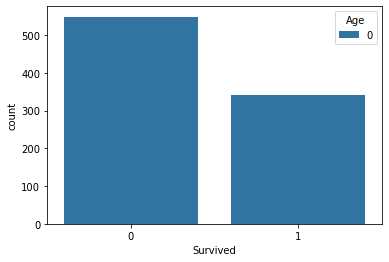

In [33]:
sns.countplot(x=train['Survived'], hue=train['Age'])

In [34]:
# 성별전처리
# male : 0 , female : 1
mapping = {'male':0, 'female':1}
train['Sex'] = train['Sex'].map(mapping)

In [35]:
mapping = {'male':0, 'female':1}
test['Sex'] = test['Sex'].map(mapping)

In [36]:
train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [37]:
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,NaN,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,NaN,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,NaN,0.114631,0.245489,0.182333
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,-0.035322,0.083081,0.114631,NaN,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,NaN,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,NaN,0.159651,0.216225,1.000000


In [38]:
# 자료형 변환
# Age의 자료형 float64 -> int64
train['Age'] = train['Age'].astype('int64')

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 62.8+ KB


In [40]:
# Embarked 결측치 처리
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
train['Embarked'].isnull().sum()

2

In [42]:
# 탑승항구 결측치는 가장 갯수가 많은 S로 대체
train['Embarked'] = train['Embarked'].fillna('S')

In [43]:
mapping = {'S':0, 'C':1, 'Q':2}
train['Embarked'] = train['Embarked'].map(mapping)

In [44]:
mapping = {'S':0, 'C':1, 'Q':2}
test['Embarked'] = test['Embarked'].map(mapping)

In [45]:
test['Embarked'].value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

In [46]:
train['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [47]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,0,0,0,8.0500,0


In [48]:
# 요금
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [49]:
# 요금 범위
# <=7, <=15, <=30, <=45, <=60, <=100, 나머지
def fareTransform(v):
    c = 0
    if v <= 7 : c = 0
    elif v <= 15 : c=1
    elif v <= 30 : c=2
    elif v <= 45 : c=3
    elif v <= 60 : c=4
    elif v <= 100 : c=5
    else : c=6
    return c

In [50]:
train['Fare'] = train['Fare'].apply(fareTransform)

In [51]:
test['Fare'] = test['Fare'].apply(fareTransform)

In [52]:
train['Fare'].value_counts()

1    430
2    199
5     69
3     63
6     53
4     49
0     28
Name: Fare, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

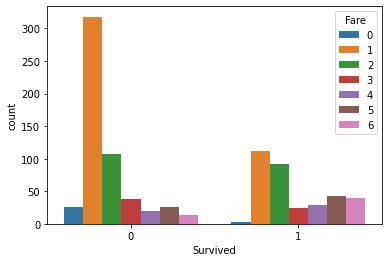

In [53]:
sns.countplot(x=train['Survived'], hue=train['Fare'])

In [54]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,0,1,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1,0,5,1
2,1,3,"Heikkinen, Miss. Laina",1,0,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1,0,4,0
4,0,3,"Allen, Mr. William Henry",0,0,0,0,1,0


In [55]:
train['Name'] = train['Name'].str.extract(' ([A-Za-z]+)\.')

In [56]:
test['Name'] = test['Name'].str.extract(' ([A-Za-z]+)\.')

In [57]:
train['Name'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Sir           1
Ms            1
Don           1
Jonkheer      1
Capt          1
Lady          1
Mme           1
Countess      1
Name: Name, dtype: int64

In [58]:
# 성별과 호칭 크로스 비교
pd.crosstab(train['Name'], train['Sex'])

Sex,0,1
Name,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [59]:
# Ms,Mlle,Mme -> Miss 치환
train['Name'] = train['Name'].str.replace('Ms', 'Miss')
train['Name'] = train['Name'].str.replace('Mlle', 'Miss')
train['Name'] = train['Name'].str.replace('Mme', 'Miss')

In [60]:
test['Name'] = test['Name'].str.replace('Ms', 'Miss')
test['Name'] = test['Name'].str.replace('Mlle', 'Miss')
test['Name'] = test['Name'].str.replace('Mme', 'Miss')

In [61]:
train['Name'].value_counts()

Mr          517
Miss        186
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Lady          1
Capt          1
Countess      1
Jonkheer      1
Don           1
Sir           1
Name: Name, dtype: int64

In [62]:
train[['Name','Survived']].groupby('Name').mean()

,Survived
Name,
Capt,0.000000
Col,0.500000
Countess,1.000000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000


In [63]:
# Countess, Lady, Sir -> 성공
# Capt, Don, Jonkheer, Rev -> 실패
# Col, Dr, Major, Master -> 중간
train['Name'] = train['Name'].replace(['Countess','Lady','Sir'], 'Suc')
train['Name'] = train['Name'].replace(['Capt','Don','Jonkheer','Rev'], 'Fail')
train['Name'] = train['Name'].replace(['Col','Dr','Major','Master'], 'Med')

In [64]:
test['Name'] = test['Name'].replace(['Countess','Lady','Sir'], 'Suc')
test['Name'] = test['Name'].replace(['Capt','Don','Jonkheer','Rev'], 'Fail')
test['Name'] = test['Name'].replace(['Col','Dr','Major','Master'], 'Med')

In [65]:
train[['Name','Survived']].groupby('Name').mean()

,Survived
Name,
Fail,0.000000
Med,0.549020
Miss,0.704301
Mr,0.156673
Mrs,0.792000
Suc,1.000000


In [66]:
mapping = {'Fail':0, 'Mr':1, 'Med':2, 'Miss':3, 'Mrs':4, 'Suc':5}
train['Name'] = train['Name'].map(mapping)
train[['Name','Survived']].groupby('Name').mean()

,Survived
Name,
0,0.000000
1,0.156673
2,0.549020
3,0.704301
4,0.792000
5,1.000000


In [67]:
mapping = {'Fail':0, 'Mr':1, 'Med':2, 'Miss':3, 'Mrs':4, 'Suc':5}
test['Name'] = test['Name'].map(mapping)

In [68]:
test['Name'].value_counts()

1.0    240
3.0     79
4.0     72
2.0     24
0.0      2
Name: Name, dtype: int64

In [69]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0,0,1,0,1,0
1,1,1,4,1,0,1,0,5,1
2,1,3,3,1,0,0,0,1,0
3,1,1,4,1,0,1,0,4,0
4,0,3,1,0,0,0,0,1,0


In [70]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,0,4,0,0,1,2
1,3,4.0,1,5,1,0,0,0
2,2,1.0,0,6,0,0,1,2
3,3,1.0,0,3,0,0,1,0
4,3,4.0,1,2,1,1,1,0


In [71]:
# 원핫인코딩
sex = pd.get_dummies(train['Sex'])
sex.columns = ['M','F']
train = pd.concat([train, sex], axis=1)

In [72]:
sex = pd.get_dummies(test['Sex'])
sex.columns = ['M','F']
test = pd.concat([test, sex], axis=1)

In [73]:
em = pd.get_dummies(train['Embarked'])
em.columns = ['S','Q','C']
train = pd.concat([train, em], axis=1)

In [74]:
em = pd.get_dummies(test['Embarked'])
em.columns = ['S','Q','C']
test = pd.concat([test, em], axis=1)

In [75]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,M,F,S,Q,C
0,0,3,1,0,0,1,0,1,0,1,0,1,0,0
1,1,1,4,1,0,1,0,5,1,0,1,0,1,0
2,1,3,3,1,0,0,0,1,0,0,1,1,0,0
3,1,1,4,1,0,1,0,4,0,0,1,1,0,0
4,0,3,1,0,0,0,0,1,0,1,0,1,0,0


In [76]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,M,F,S,Q,C
0,3,1.0,0,4,0,0,1,2,1,0,0,0,1
1,3,4.0,1,5,1,0,0,0,0,1,1,0,0
2,2,1.0,0,6,0,0,1,2,1,0,0,0,1
3,3,1.0,0,3,0,0,1,0,1,0,1,0,0
4,3,4.0,1,2,1,1,1,0,0,1,1,0,0


In [77]:
# 원핫인코딩 후 기존 컬럼 삭제
train.drop(['Sex','Embarked'], axis=1, inplace=True)

In [78]:
test.drop(['Sex','Embarked'], axis=1, inplace=True)

In [79]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,M,F,S,Q,C
0,0,3,1,0,1,0,1,1,0,1,0,0
1,1,1,4,0,1,0,5,0,1,0,1,0
2,1,3,3,0,0,0,1,0,1,1,0,0
3,1,1,4,0,1,0,4,0,1,1,0,0
4,0,3,1,0,0,0,1,1,0,1,0,0


In [80]:
test.head()

,Pclass,Name,Age,SibSp,Parch,Fare,M,F,S,Q,C
0,3,1.0,4,0,0,1,1,0,0,0,1
1,3,4.0,5,1,0,0,0,1,1,0,0
2,2,1.0,6,0,0,1,1,0,0,0,1
3,3,1.0,3,0,0,1,1,0,1,0,0
4,3,4.0,2,1,1,1,0,1,1,0,0


In [72]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

In [74]:
# SVM
model = SVC()
# cross validation 하고, 평가점수 리턴
scores = cross_val_score(model, train.drop('Survived',1), train['Survived'], cv=10)
scores.mean()

0.8282896379525593

In [75]:
model = GaussianNB()
# cross validation 하고, 평가점수 리턴
scores = cross_val_score(model, train.drop('Survived',1), train['Survived'], cv=10)
scores.mean()

0.7946192259675405

In [76]:
model = KNeighborsClassifier()
# cross validation 하고, 평가점수 리턴
scores = cross_val_score(model, train.drop('Survived',1), train['Survived'], cv=10)
scores.mean()

0.8047940074906366

In [78]:
# 파라미터 튜닝
from sklearn.model_selection import GridSearchCV
params = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'gamma':[0.001, 0.01, 0.1, 1, 10, 100]
}
gs = GridSearchCV(SVC(), params, cv=10)
gs.fit(train.drop('Survived',1), train['Survived'])
gs.best_params_

{'C': 100, 'gamma': 0.01}

In [80]:
model = SVC(C=100, gamma=0.01)
# cross validation 하고, 평가점수 리턴
scores = cross_val_score(model, train.drop('Survived',1), train['Survived'], cv=10)
scores.mean()

0.8350062421972535

In [89]:
model = DecisionTreeClassifier(max_depth=4)
# cross validation 하고, 평가점수 리턴
scores = cross_val_score(model, train.drop('Survived',1), train['Survived'], cv=10)
scores.mean()

0.8237578027465668

In [90]:
model = RandomForestClassifier()
# cross validation 하고, 평가점수 리턴
scores = cross_val_score(model, train.drop('Survived',1), train['Survived'], cv=10)
scores.mean()

0.8092134831460674

In [92]:
# 랜덤포레스트 하이퍼파라미터 튜닝
params = {
    'n_estimators':[100,300,500,1000],
    'max_depth':[3,4,5,6,7],
}
gs = GridSearchCV(RandomForestClassifier(), params, cv=10, n_jobs=-1)
gs.fit(train.drop('Survived',1), train['Survived'])
gs.best_params_

{'max_depth': 5, 'n_estimators': 300}

In [93]:
model = RandomForestClassifier(max_depth=5, n_estimators=300)
# cross validation 하고, 평가점수 리턴
scores = cross_val_score(model, train.drop('Survived',1), train['Survived'], cv=10)
scores.mean()

0.8338951310861423

In [96]:
# 인공신경망
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, solver='adam', activation='relu')
# cross validation 하고, 평가점수 리턴
scores = cross_val_score(model, train.drop('Survived',1), train['Survived'], cv=10)
scores.mean()

0.8126591760299625

In [98]:
from xgboost import XGBClassifier
model = XGBClassifier(verbosity=0)
# cross validation 하고, 평가점수 리턴
scores = cross_val_score(model, train.drop('Survived',1), train['Survived'], cv=10)
scores.mean()

0.8070037453183521

In [99]:
model = XGBClassifier(verbosity=0, max_depth=5, n_estimators=300)
# cross validation 하고, 평가점수 리턴
scores = cross_val_score(model, train.drop('Survived',1), train['Survived'], cv=10)
scores.mean()

0.8103745318352059

In [100]:
model = SVC(C=100, gamma=0.01)
# cross validation 하고, 평가점수 리턴
scores = cross_val_score(model, train.drop('Survived',1), train['Survived'], cv=10)
scores.mean()

0.8350062421972535

In [101]:
from sklearn.metrics import confusion_matrix

In [103]:
# 혼동행렬
# cross validation에서 예측한 데이터 출력
pred = cross_val_predict(model, train.drop('Survived',1), train['Survived'], cv=10)
confusion_matrix(train['Survived'], pred, labels=[1,0])

array([[249,  93],
       [ 54, 495]], dtype=int64)

In [105]:
from sklearn.metrics import classification_report
print(classification_report(train['Survived'], pred, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.82      0.73      0.77       342
           0       0.84      0.90      0.87       549

    accuracy                           0.84       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.84      0.83       891



### 모델을 선택해서 테스트셋에 적용

In [106]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [165]:
# 테스트데이터 전처리
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Name    417 non-null    float64
 2   Age     418 non-null    int64  
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    int64  
 6   M       418 non-null    uint8  
 7   F       418 non-null    uint8  
 8   S       418 non-null    uint8  
 9   Q       418 non-null    uint8  
 10  C       418 non-null    uint8  
dtypes: float64(1), int64(5), uint8(5)
memory usage: 21.8 KB


In [166]:
# 테스트셋은 호칭에 한개가 결측치
test['Name'] = test['Name'].fillna(1)

In [167]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Name    418 non-null    float64
 2   Age     418 non-null    int64  
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    int64  
 6   M       418 non-null    uint8  
 7   F       418 non-null    uint8  
 8   S       418 non-null    uint8  
 9   Q       418 non-null    uint8  
 10  C       418 non-null    uint8  
dtypes: float64(1), int64(5), uint8(5)
memory usage: 21.8 KB


In [169]:
# 최종선택 모델
model = SVC(C=100, gamma=0.01)
# cross validation 하고, 평가점수 리턴
scores = cross_val_score(model, train.drop('Survived',1), train['Survived'], cv=10)
scores.mean()

0.8350062421972535

In [171]:
# 최종선택한 모델로 학습, 예측
model = SVC(C=100, gamma=0.01)
model.fit(train.drop('Survived',1), train['Survived'])
pred = model.predict(test)

In [172]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [176]:
# PassengerId, Survived -> csv파일
test_org = pd.read_csv('test.csv')
# 데이터프레임으로 생성
output = pd.DataFrame({
    'PassengerId':test_org['PassengerId'],
    'Survived':pred
})
# csv 파일로 출력
output.to_csv('predict.csv', index=False)

In [ ]:
# kaggle 사이트에 제출하는 방법
# submit Predictions
# step1 파일 업로드
# step2 메모

### 딥러닝 구현

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Name      891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int64
 7   M         891 non-null    uint8
 8   F         891 non-null    uint8
 9   S         891 non-null    uint8
 10  Q         891 non-null    uint8
 11  C         891 non-null    uint8
dtypes: int64(7), uint8(5)
memory usage: 53.2 KB


In [86]:
train.drop('Survived',1)

,Pclass,Name,Age,SibSp,Parch,Fare,M,F,S,Q,C
0,3,1,0,1,0,1,1,0,1,0,0
1,1,4,0,1,0,5,0,1,0,1,0
2,3,3,0,0,0,1,0,1,1,0,0
3,1,4,0,1,0,4,0,1,1,0,0
4,3,1,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,0,0,1,1,0,1,0,0
887,1,3,0,0,0,2,0,1,1,0,0
888,3,3,0,1,2,2,0,1,1,0,0
889,1,1,0,0,0,2,1,0,0,1,0


In [92]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(train.drop('Survived',1), train['Survived'], random_state=10)

In [93]:
train_x.shape, train_y.shape

((668, 11), (668,))

In [94]:
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
valid_y = to_categorical(valid_y)

In [95]:
train_y.shape

(668, 2)

In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # 모델객체생성을 위한 클래스
from tensorflow.keras.layers import Dense # 레이어추가를 위한 클래스
# 랜덤시드값
tf.random.set_seed(14)

# 모델 구현
model = Sequential() # 객체 생성

# 데이터 입력받는 레이어
# Dense(출력데이터차원, 활성화함수, 입력데이터차원)
model.add(Dense(64, activation='relu', input_shape=(11,)))

# 레이어 추가
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

# 출력레이어
# label 값의 종류만큼 차원 지정
# 활성화함수 -> softmax
model.add(Dense(2, activation='softmax'))

# 모델 설정
# compile()
# 최적화기법 : adam(learning_rate=0.001)
# 손실함수 : categorical_crossentropy
# 평가지표 : accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 학습
# epochs : 학습횟수
# validation_data : 검증데이터
model.fit(train_x, train_y, epochs=100, batch_size=50, validation_data=(valid_x, valid_y))

Epoch 1/100
14/14 [==============================] - 1s 30ms/step - loss: 0.7036 - accuracy: 0.4997 - val_loss: 0.6180 - val_accuracy: 0.7668
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6204 - accuracy: 0.6992 - val_loss: 0.5251 - val_accuracy: 0.7982
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5236 - accuracy: 0.7694 - val_loss: 0.4200 - val_accuracy: 0.8161
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.7881 - val_loss: 0.3948 - val_accuracy: 0.8296
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4621 - accuracy: 0.7868 - val_loss: 0.4107 - val_accuracy: 0.8296
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4480 - accuracy: 0.7903 - val_loss: 0.4286 - val_accuracy: 0.8027
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4218 - accuracy: 0.8201 - val_loss: 0.4235 - val_accuracy: 0.8161
Epoch 8/100


Epoch 59/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3363 - accuracy: 0.8534 - val_loss: 0.5272 - val_accuracy: 0.8251
Epoch 60/100
14/14 [==============================] - 0s 7ms/step - loss: 0.3898 - accuracy: 0.8194 - val_loss: 0.5095 - val_accuracy: 0.8117
Epoch 61/100
14/14 [==============================] - 0s 7ms/step - loss: 0.3024 - accuracy: 0.8822 - val_loss: 0.5372 - val_accuracy: 0.8117
Epoch 62/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3238 - accuracy: 0.8762 - val_loss: 0.5280 - val_accuracy: 0.8117
Epoch 63/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3363 - accuracy: 0.8717 - val_loss: 0.5391 - val_accuracy: 0.8117
Epoch 64/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3275 - accuracy: 0.8590 - val_loss: 0.5722 - val_accuracy: 0.8117
Epoch 65/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3419 - accuracy: 0.8606 - val_loss: 0.5293 - val_accuracy: 0.8161
Epoch 